In [1]:
from pathlib import Path
from Datagen import train_test
# from Compile_the_data import train_test_for_pca
from Compile_the_data import dataset_for_classic
from Compile_the_data import train_test_for_pca_and_classic

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from ensemble_model import ensemble_models

In [3]:
paths = [
    Path("img5_stripes/2/"),
    Path("img5_stripes/3/"),
      Path("img4_stripes/")
]

In [4]:
def condition(a):
    # based on dataset inspection plots
    return (0.120 > a) & (a > 0.105)

In [5]:
params_net = {"max_size": 1,
              "min_size": 1,
              "min_features" : 0.5,
              "max_features" : 1,
              "max_epoches" : 300,
              "min_epoches" : 250,
              "Batches" : [5, 3],
              "lr" : [1e-3]
}

params_classic = {"max_size": 1,
                  "min_size": 0.5,
                  "h" : [ 0.0001, 0.0002, 0.5*0.0001]
}

params_tree = {"max_size": 1,
               "min_size": 0.5,
               "min_features" : 0.5,
               "max_features" : 1,
               "lr" : [1.01], 
               "max_depth" : [80, 100], 
               "n_estimators" : [100, 150, 50]
}



In [15]:
start = 0.4
end = 0.6
n_classics= 10
n_neural= 15
n_forests= 0

In [7]:
BATCH=5
N_COMPONENTS = 50
train_test_sp = train_test_for_pca_and_classic(paths, N_COMPONENTS, filtered = condition) ## train_test(...) for average data
train_dataset, test_dataset = train_test_sp.get()

In [8]:
train_target_classic = [train_dataset.target for i in range(len(train_dataset.inten))]
test_target_classic = [test_dataset.target for i in range(len(test_dataset.inten))]

train_classic = [train_target_classic, train_dataset.inten]
test_classic = [test_target_classic, test_dataset.inten]

In [16]:
ensemble = ensemble_models(n_classics= n_classics, n_neural= n_neural, n_forests= n_forests, 
                           params_net = params_net, params_classic = params_classic, 
                           params_tree = params_tree, start = start, end = end)

In [17]:
ensemble.fit(train_classic, train_dataset)

Starting classical fitting



/Users/maxim/Documents/Git Hub/quantTechLab/analysis/fitting_data.py:38: RuntimeWarning: Mean of empty slice.
  mu = Y[abs(X-phi)<self.h].mean()
/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Finished classical fitting:
 It took 0.318 seconds

Starting machine learning

Starting train 0 model

(3019,)
(3019, 150)


/Users/maxim/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


-----------------------------

Finished train 0 model

Starting train 1 model

(3019,)
(3019, 150)
-----------------------------

Finished train 1 model

Starting train 2 model

(3019,)
(3019, 150)
-----------------------------

Finished train 2 model

Starting train 3 model

(3019,)
(3019, 150)
-----------------------------

Finished train 3 model

Starting train 4 model

(3019,)
(3019, 150)
-----------------------------

Finished train 4 model

Starting train 5 model

(3019,)
(3019, 150)
-----------------------------

Finished train 5 model

Starting train 6 model

(3019,)
(3019, 150)
-----------------------------

Finished train 6 model

Starting train 7 model

(3019,)
(3019, 150)
-----------------------------

Finished train 7 model

Starting train 8 model

(3019,)
(3019, 150)
-----------------------------

Finished train 8 model

Starting train 9 model

(3019,)
(3019, 150)
-----------------------------

Finished train 9 model

Starting train 10 model

(3019,)
(3019, 150)
---------

In [11]:
prediction, pred = ensemble.predict(test_classic[1], test_dataset)

/Users/maxim/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'Ensemble: n_classics = 10, n_neural = 10, n_trees = 10')

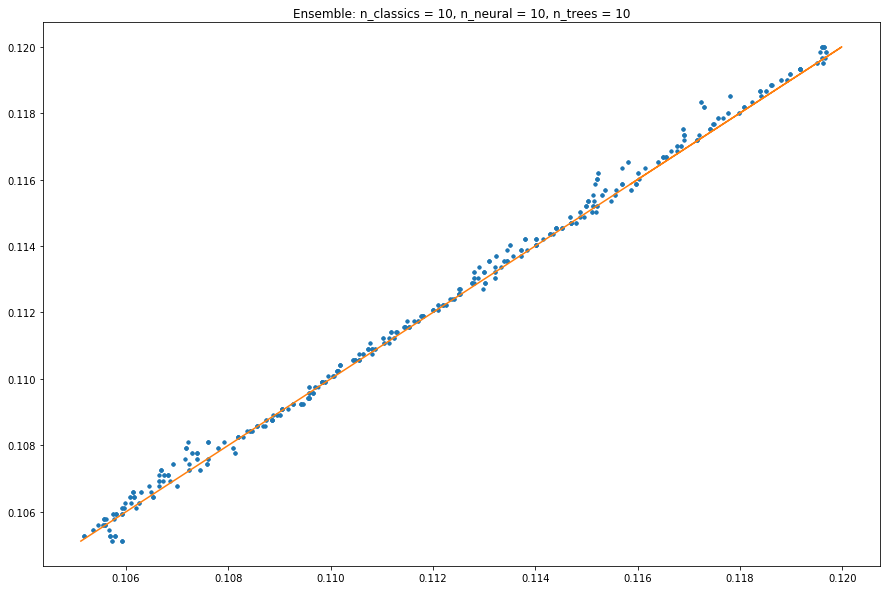

In [12]:
fig = plt.figure(figsize = (15, 10))
plt.plot(pred, test_dataset.target, '.')
plt.plot(test_dataset.target, test_dataset.target)
plt.title("Ensemble: n_classics = {}, n_neural = {}, n_trees = {}".format(n_classics, n_neural, n_forests))

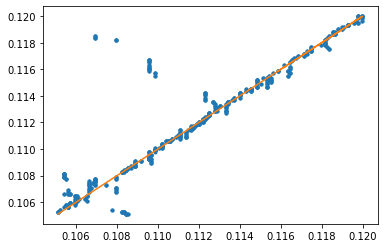

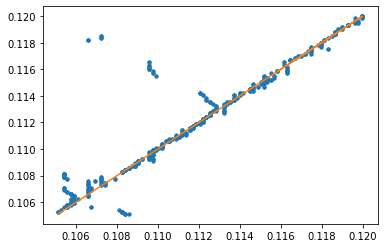

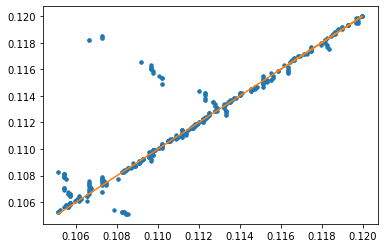

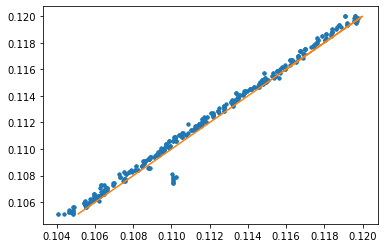

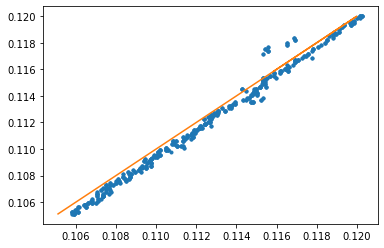

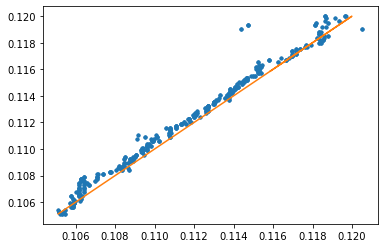

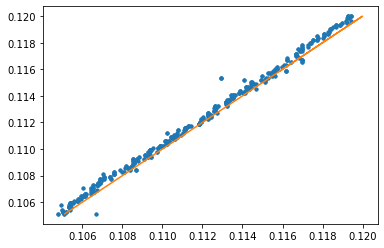

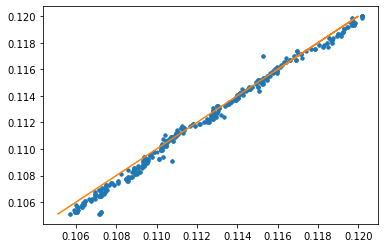

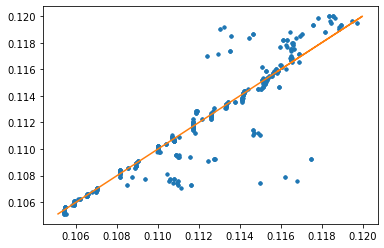

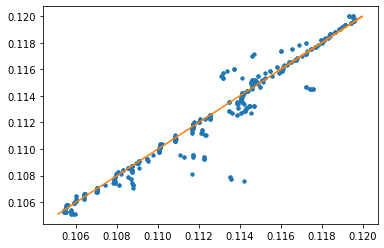

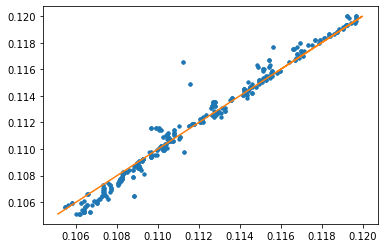

In [13]:
for i in range(len(prediction)):
    plt.plot(prediction[i], test_dataset.target, '.')
    plt.plot(test_dataset.target, test_dataset.target)
    plt.show()

In [25]:
import numpy as np

In [26]:
np.corrcoef(pred, test_dataset.target)

array([[1.        , 0.99916128],
       [0.99916128, 1.        ]])

In [27]:
a = [2, 4, 5]

b = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [12]:
b[:, a]

array([[2, 4, 5],
       [2, 4, 5],
       [2, 4, 5],
       [2, 4, 5],
       [2, 4, 5]])